## t-SNE

**t-SNE** (t-distributed stochastic neighbor embedding) is a Machine Learning algorithm for dimensionality reduction based on Stochastic Neighbor Embedding. 

https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf

**t-SNE** has two steps:
1. Convert the high-dimensional Euclidean distances between datapoints into conditional probabilities that represent similarities. The similarity of datapoint $x_i$ to datapoint $x_j$ is the conditional probability $p_{j|i}$ given by:

$p_{j|i} = \frac{\text{exp}\left ( \frac{-||x_i-x_j||^2}{2\sigma_i^2} \right )}{\sum_{k \ne i}\text{exp}\left (\frac{-||x_i-x_k||^2}{2\sigma_i^2} \right )}$ 

In low dimensional embedding distance between two points $y_i$ and $y_j$, $q_{ij}$ is defined as:

$q_{ij}= \frac{(1+||y_i-y_j||^2)^{-1}}{\sum_{k \ne l } (1+||y_i-y_j||^2)^{-1}}$

Which is Student's t distribution with 1 degree of freedom.

2. Next we define KL divergence between these two distributions, to measure how faithfully $q_{ij}$ represents $p_{j|i}$. t-SNE minimizes the sum of KL over all data points using gradient descent method.

$C=\sum_{i}\sum_{j}p_{j|i}\text{log}\frac{p_{j|i}}{q_{j|i}}$

The gradient of $C$ w.r.t $y_i$ is defined as:

$\frac{\partial C}{\partial y_i} = 4 \sum_j (p_{ij}-q_{ij})(y_i-y_j)(1+||y_i-y_j||^2)^{-1}$


In the notebook below we will use sklearn implementation of $t-SNE$ to visualize a 2D in 1D.

In [1]:
#import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Make blobs dataset
from sklearn.datasets import make_blobs
(X,y) = make_blobs(n_samples=10000, 
               n_features=2,
                centers=[[0,0],[5,1],[-3,3],[5,5]])

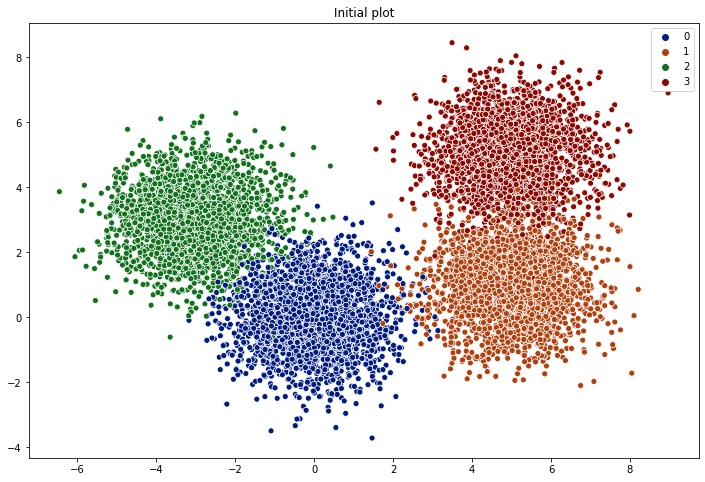

In [3]:
plt.figure(figsize=(12,8))
plt.title('Initial plot')
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='dark')

In [4]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=1).fit_transform(X)

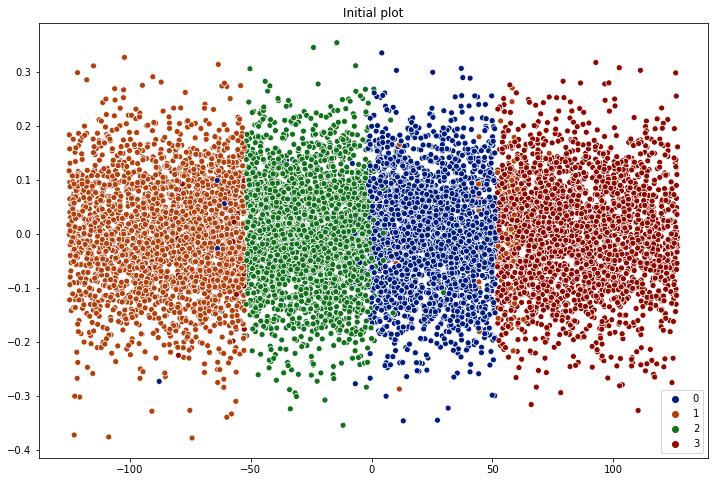

In [5]:
plt.figure(figsize=(12,8))
plt.title('Initial plot')
sns.scatterplot(X_embedded[:,0], 0.1*np.random.randn(10000), hue=y, palette='dark')

We can see from the above plot how **t-SNE** is able to embed 2D data to 1D. For visualization purposes i have added a y dimension which is just normal noise.